In [22]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import cv2

In [23]:
# A function summing the values in a window
def H_sum(img,x,y,pad):
    s = 0
    for i in range(x-pad,x+pad+1):
        for j in range(y-pad,y+pad+1):
            s = s + img[i,j]
    return s

In [54]:
def harris(img,win_size,threshold):
    img_out = img.copy()
    img_corners = np.zeros(img.shape)X
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # padding for the convolution
    pad = win_size // 2
    img_pad = np.pad(img,((pad,pad),(pad,pad)) , mode='constant', constant_values=0)
    
    # Using Sobel operator to acquire the derivatives of the image 
    x = cv2.Sobel(img_pad,cv2.CV_16S,1,0)
    y = cv2.Sobel(img_pad,cv2.CV_16S,0,1)
    # transform back into uint8
    dx = cv2.convertScaleAbs(x)
    dy = cv2.convertScaleAbs(y)
    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxdy = dx*dy
    
    img_f = np.zeros(img.shape)
    
    # Find the Harris Operators
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # sum the drivatives in each windows
            dx2_sum = H_sum(dx2,i+pad,j+pad,pad)
            dy2_sum = H_sum(dy2,i+pad,j+pad,pad)
            dxdy_sum = H_sum(dxdy,i+pad,j+pad,pad)
            # f = determinant(H)/trace(H). Adding 0.01 to avoid zero.
            img_f[i,j] = (dx2_sum*dy2_sum-(dxdy_sum**2)/(dx2_sum+dy2_sum+0.01))
    
    # normalize the harris matrix to determine the threshold                      
    cv2.normalize(img_f, img_f, 0, 1, cv2.NORM_MINMAX)

    # find all points above threshold
    img_f = np.where(img_f >= threshold)
    
    # loop though the points
    for pt in zip(*img_f[::-1]):
        #draw filled circle on each point for easier view
        cv2.circle(img_out, pt, 1, (0, 0, 255), -1)
    
    # make an image with only corners 
    img_corners[img_f]=[255,255,255]

    return img_out, img_corners


In [55]:
img1 = cv2.imread("giraffe.png")
img_c1, img1_f = harris(img1,3,0.6)
img2= cv2.imread("dog.jpg")
img_c2, img2_f = harris(img2,3,0.6)

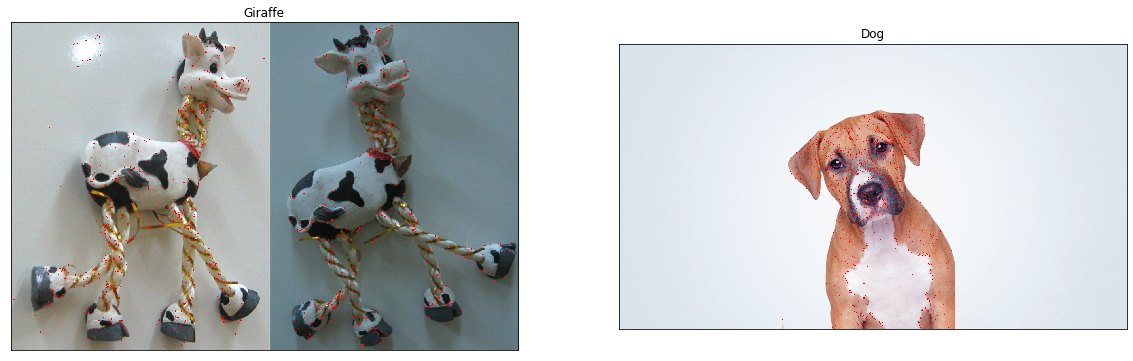

True

In [56]:
plt.figure(figsize=(20, 15))
plt.subplot(121), plt.imshow(cv2.cvtColor(img_c1, cv2.COLOR_BGR2RGB))
plt.title("Giraffe"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(img_c2, cv2.COLOR_BGR2RGB))
plt.title("Dog"), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("giraffe_with_corners.png", img_c1)
cv2.imwrite("doge_with_corners.png", img_c2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


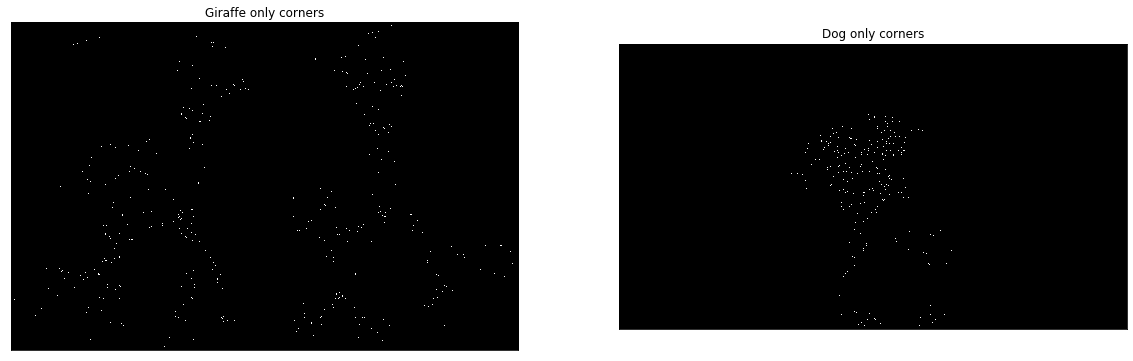

True

In [57]:
plt.figure(figsize=(20, 15))
plt.subplot(121), plt.imshow(img1_f)
plt.title("Giraffe only corners"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2_f)
plt.title("Dog only corners"), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("giraffe_only_corners.png", img1_f)
cv2.imwrite("doge_only_corners.png", img2_f)